In [1]:
#Build the linear regression model using scikit learn in boston data to predict 'Price'
#based on other dependent variable.

In [2]:
# import corresponding libraries: 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
%matplotlib inline

In [3]:
# load boston housing data available in scipy into a dataframe bos

boston = load_boston()

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [5]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [6]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [7]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

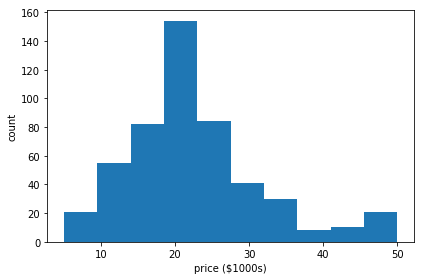

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize = (6, 4))
plt.hist(boston.target)
plt.xlabel('price ($1000s)')
plt.ylabel('count')
plt.tight_layout()

In [9]:
bos = pd.DataFrame(boston.data, columns=boston.feature_names)
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
bos['Price'] = boston.target

In [11]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [12]:
# Exploaratory Data Analysis 

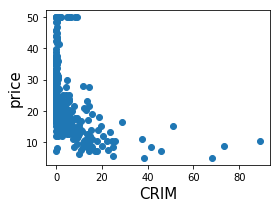

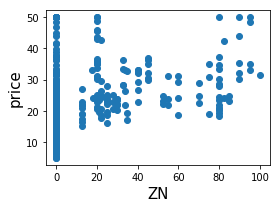

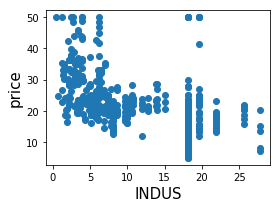

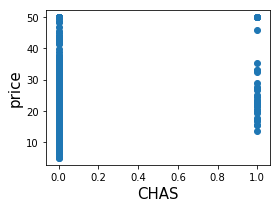

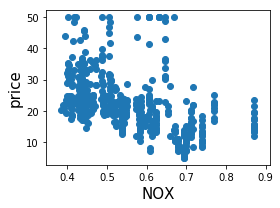

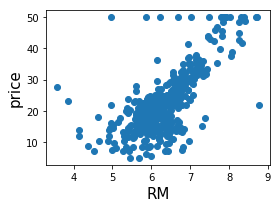

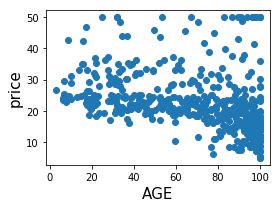

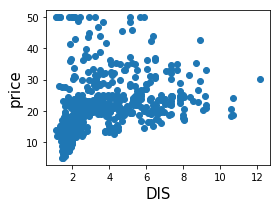

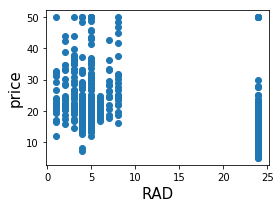

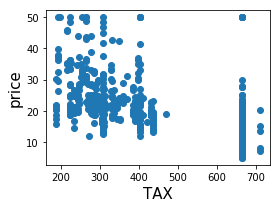

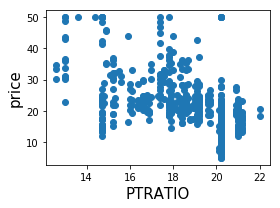

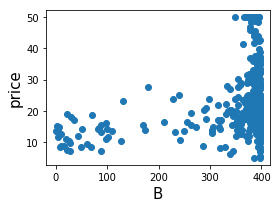

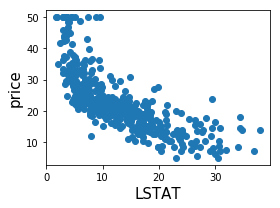

In [14]:
# Print the scatter plot for each feature with respect to price

for index, feature_name in enumerate(boston.feature_names):
    plt.figure(figsize = (4, 3))
    plt.scatter(boston.data[:, index], boston.target)
    plt.ylabel('price', size=15)
    plt.xlabel(feature_name, size=15)
    plt.tight_layout()

In [15]:
# Split train-test dataset

# Split the dataset into two: target value and predictor values.
# Let’s call the target value Y and predictor values X.
# Thus,
# Y = Boston Housing Price X = All other features

In [17]:
X = bos.drop('Price', axis=1)
Y = bos.Price
print("X Shape : ", X.shape)
print("Y Shape : ", Y.shape)

X Shape :  (506, 13)
Y Shape :  (506,)


In [18]:
from sklearn.model_selection import train_test_split

# splitting 66.66% for train data and 33.33% for test data.

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.33,random_state=0)
print("X_train Shape :", X_train.shape)
print("X_test Shape : ", X_test.shape)
print("Y_train Shape : ", Y_train.shape)
print("Y_test Shape : ", Y_test.shape)

X_train Shape : (339, 13)
X_test Shape :  (167, 13)
Y_train Shape :  (339,)
Y_test Shape :  (167,)


In [19]:
# By applying Linear Regression Model

In [20]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

# To train the model

lm.fit(X_train, Y_train)

# To predict the prices based on the test data

Y_pred = lm.predict(X_test)

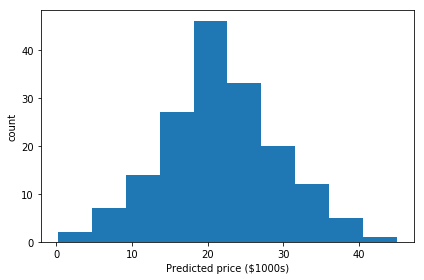

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.hist(Y_pred)
plt.xlabel('Predicted price ($1000s)')
plt.ylabel('count')
plt.tight_layout()

In [22]:
# print coefficients (Slope) beta0

print(boston.feature_names,"\n", lm.intercept_)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT'] 
 40.88297292518436


In [23]:
# print coefficients (Slope) beta1

print(boston.feature_names,"\n", lm.coef_)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT'] 
 [-1.17788072e-01  4.75879109e-02  3.65663839e-03  2.51907388e+00
 -1.66382902e+01  3.65510558e+00 -1.12696330e-02 -1.58798192e+00
  2.51678785e-01 -1.08579935e-02 -1.04937239e+00  6.32451739e-03
 -5.21213815e-01]


In [24]:
# How do we interpret the coefficients? 

In [25]:
# Holding all other variables fixed, 
#considering an area where there is more crime rate (CRIM) the predicted price of the house decrease by 1177.88 $.

# Being an urban area with good pupil-teacher ratio by town is associated with an average 
# increase in price of houses by 6324.51 $

Text(0.5,1,'Price vs Predicted prices')

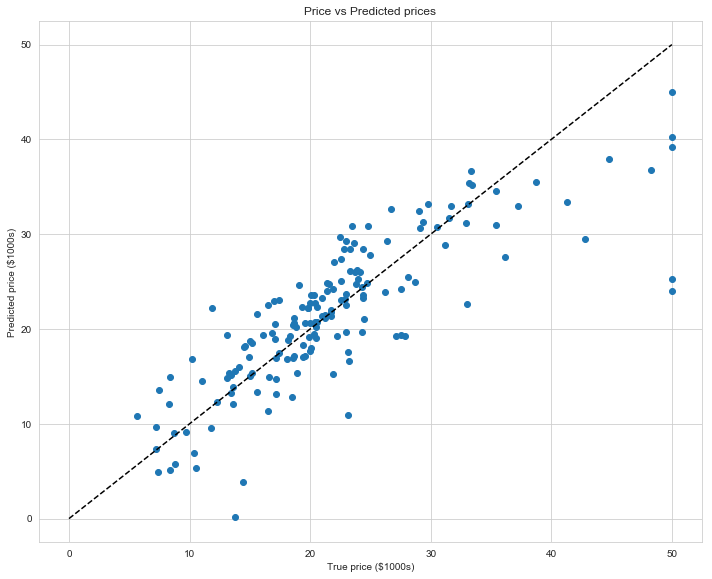

In [26]:
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize=(10, 8))
plt.scatter(Y_test, Y_pred)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.tight_layout()
plt.title("Price vs Predicted prices")

In [27]:
# Error Rate of the Model - Root Mean square error 

In [28]:
from sklearn.metrics import mean_squared_error
print("Error Rate of the Regression Model : ", mean_squared_error(Y_pred, Y_test))

Error Rate of the Regression Model :  26.551004782161


In [29]:
bos.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

In [31]:
import statsmodels.formula.api as smf

# only include TV and Radio in the model

lm = smf.ols(formula='Price ~ CRIM + ZN + INDUS + CHAS + RM + AGE + DIS + RAD + TAX + PTRATIO', data=bos).fit()
lm.rsquared

0.6516432066977669

In [34]:
import statsmodels.formula.api as smf

# only include TV and Radio in the model

lm = smf.ols(formula='Price ~ CRIM + ZN + INDUS + CHAS + RM + AGE + DIS + RAD + TAX + PTRATIO + B', data=bos).fit()
lm.rsquared

0.668661482752398

In [35]:
# Confidence Interval associated with the model 

In [36]:
import statsmodels.formula.api as smf

# only include TV and Radio in the model

lm = smf.ols(formula='Price ~ CRIM + ZN + INDUS + CHAS + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT', data=bos).fit()
lm.rsquared

0.7291693457429639

In [37]:
lm.conf_int()

,0,1
Intercept,14.931038,32.083749
CRIM,-0.163186,-0.032225
ZN,0.021155,0.076186
INDUS,-0.173707,0.064222
CHAS,0.827225,4.281414
RM,3.152623,4.821918
AGE,-0.041114,0.009980
DIS,-1.597369,-0.829722
RAD,0.129864,0.393215
TAX,-0.021157,-0.006114


In [38]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     110.6
Date:                Sat, 22 Sep 2018   Prob (F-statistic):          2.42e-131
Time:                        22:43:11   Log-Likelihood:                -1509.8
No. Observations:                 506   AIC:                             3046.
Df Residuals:                     493   BIC:                             3100.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.5074      4.365      5.385      0.000      14.931      32.084
CRIM          -0.0977      0.033     -2.932      0.004      -0.163      -0.032
ZN             0.0487      0.014      3.475      0.001       0.021       0.076
INDUS         -0.0547      0.061     -0.904      0.366      -0.174       0.064
CHAS           2.5543      0.879      2.906      0.004       0.827       4.281
RM             3.9873      0.425      9.386      0.000       3.153       4.822
AGE           -0.0156      0.013     -1.197      0.232      -0.041       0.010
DIS           -1.2135      0.195     -6.212      0.000      -1.597      -0.830
RAD            0.2615      0.067      3.903      0.000       0.130       0.393
TAX           -0.0136      0.004     -3.562      0.000      -0.021      -0.006
PTRATIO       -0.7525      0.126     -5.968      0.000      -1.000      -0.505
B              0.0103      0.003      3.780      0.000       0.005       0.016
LSTAT         -0.5417      0.052    -10.495      0.000      -0.643      -0.440
==============================================================================
Omnibus:                      187.808   Durbin-Watson:                   1.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              909.953
Skew:                           1.577   Prob(JB):                    2.55e-198
Kurtosis:                       8.763   Cond. No.                     1.14e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""